# Housing Price Simulation.

A notebook by *List your names here*.

Then, add alternating code cells and description/markdown cells,
between this top cell and the final "Running DocTest tests" section,
to answer all the elements of the final project programming assignment.

The answer to each part must be clearly identified with,
the text "Step 1" for Step 1, "Step 2" for Step 2, etc.
As noted in the assignment, you may do some of the work in copies of this project
for different sub-experiments,
rather than just putting it all in this notebook,
if you like.

In [68]:
import numpy as np
import doctest
import matplotlib.pyplot as plt
import pandas as pd
import math

seed=4221724

## Data Generation

In [69]:
def gen_data(n, y_min, alpha, mu, c, seed=1):
    
  # Validate parameters
    if y_min <= c:
        raise ValueError("y_min needs to be greater than c")
    if alpha <= 1:
        raise ValueError("alpha neds to be greater than 1")
    if mu <= 0:
        raise ValueError("mu needs to be positive")

    U = np.random.uniform(size=n)
    y = y_min * (1 - U) ** (-1.0 / alpha)

    U_exp = np.random.uniform(size=n)
    d = -mu * np.log(U_exp)

    y = np.sort(y)[::-1]
    d = np.sort(d)

   
    return y, d

## Data Gen Validation

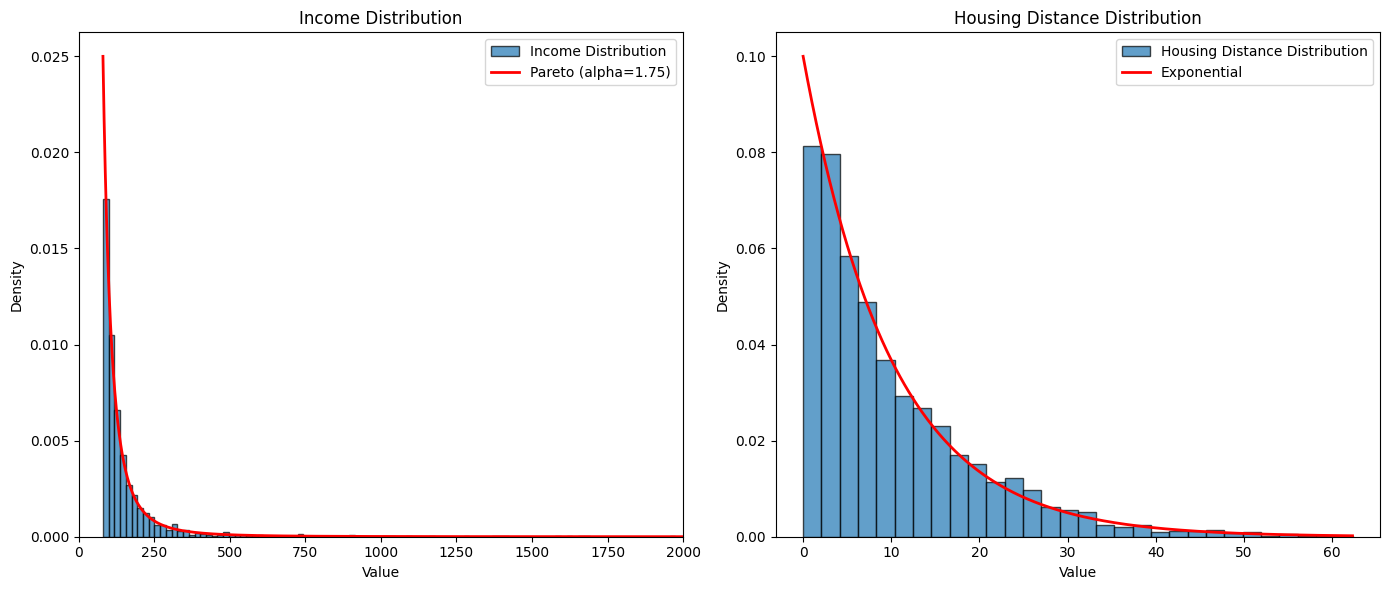

Income: [1974.38519417 1676.96898652 1654.98553312 ...   80.02435681   80.01572476
   80.00565381]
Housing Distance: [6.24825322e-03 1.01994555e-02 2.23983408e-02 ... 5.72442032e+01
 5.82885486e+01 6.23108647e+01]


In [70]:

# PLOT DISTRIBUTIONS 

def plot_distributions(n,y_min,alpha,mu,c,seed,xlim):
    
    y,d,=gen_data(n, y_min, alpha, mu, c, seed)

    # check to see if they look pareto and exp
    
    plt.figure(figsize=(14, 6))  

    # Income Distribution
    plt.subplot(1, 2, 1)
    plt.hist(y, bins=100, density=True, alpha=0.7, edgecolor="black", label="Income Distribution")
    plt.title("Income Distribution")
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.xlim(0, xlim) 

    # Add Pareto line
    pareto_x = np.linspace(y_min, xlim, xlim)
    pareto_pdf = (alpha * y_min**alpha) / (pareto_x ** (alpha + 1))
    plt.plot(pareto_x, pareto_pdf, 'r-', lw=2, label="Pareto (alpha=1.75)")
    plt.legend()

    # Housing Distance Distribution
    plt.subplot(1, 2, 2)
    plt.hist(d, bins=30, density=True, alpha=0.7, edgecolor="black", label="Housing Distance Distribution")
    plt.title("Housing Distance Distribution")
    plt.xlabel("Value")
    plt.ylabel("Density")

    # Add Exponential line
    exp_x = np.linspace(0, d.max(), 500)
    exp_pdf = (1 / mu) * np.exp(-exp_x / mu)
    plt.plot(exp_x, exp_pdf, 'r-', lw=2, label="Exponential")
    plt.legend()

    plt.tight_layout()
    plt.show()
    
    print(f'Income: {y}')
    print(f'Housing Distance: {d}')


# Generate samples for visualization
n_test = 2000
y_min_test = 80
alpha_test = 2
mu_test = 10
c_test = 50


plot_distributions(n_test,y_min_test,alpha_test,mu_test,c_test,seed,xlim=2000) #xlim for readibility



## Visualization and Statistics

In [71]:
def compute_statistics(prices):
    average = np.mean(prices)
    median = np.median(prices)
    Q1 = np.percentile(prices, 25)
    Q3 = np.percentile(prices, 75)
    IQR = Q3 - Q1

    statistics = {
        'average': average,
        'median': median,
        'Q1' : Q1,
        'Q3' : Q3,
        'IQR': IQR
    }

    return statistics


def plot_house_prices(y, prices):
    n = len(y)
    income_quantiles = np.linspace(1, 0, n)

    plt.figure(figsize=(12, 6))
    plt.scatter(income_quantiles, prices, s=10, alpha=0.5, color='b')
    plt.xlabel('Income Quantile (0 = Lowest Income, 1 = Highest Income)')
    plt.ylabel('House Price')
    plt.title('House Prices vs. Income Quantile')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


def plot_percentage_income_spent(y, prices):
    n = len(y)
    income_quantiles = np.linspace(1, 0, n)
    with np.errstate(divide='ignore', invalid='ignore'):
        percentage_spent = np.where(y != 0, (prices / y) * 100, 0)

    plt.figure(figsize=(10, 6))
    plt.plot(income_quantiles, percentage_spent, marker='s', linestyle='--', color='r')
    plt.xlabel('Income Quantile (0 = Lowest Income, 1 = Highest Income)')
    plt.ylabel('Percentage of Income Spent on Housing (%)')
    plt.title('Percentage of Income Spent on Housing vs. Income Quantile')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#plot_house_prices(y, prices)
#plot_percentage_income_spent(y, prices)
#print(compute_statistics(prices))

## 2a: basic recursion

In [72]:
def get_price_recursive(j, n, c, y, d):
    # Input checks:
    if j < 1 or j > n:
        raise ValueError("invalid j")

    # Base case: p_n = c
    if j == n:
        return c

    # Recursive step:
    theta_j = math.exp(-(d[j] - d[j-1]))  # d[j] = d_j+1
    
    # Using 0-based indexing: y[j] is y_j+1
    p_j_plus_1 = get_price_recursive(j+1, n, c, y, d)
    
    p_j = theta_j * p_j_plus_1 + (1 - theta_j) * y[j]  # y[j] = y_j+1
    return p_j

# create price array
def calc_prices_recursive(n, c, y, d):
    prices = []
    for j in range(1, n+1):
        p_j = get_price_recursive(j, n, c, y, d)
        prices.append(p_j)
    return prices


# testing
n = 2000
y_min = 80
alpha = 1.75
mu = 10
c = 50
y,d = gen_data(n,y_min,alpha,mu,c,seed)
prices = calc_prices_recursive(n,c,y,d)

#  Create DataFrame
test_df = pd.DataFrame({
    'Agent': range(1, n + 1),
    'Income (y)': y,
    'Distance (d)': d,
    'rec_prices': prices,
})

print(test_df)
print(test_df.describe())

test_df.to_excel('rec.xlsx', index=False)


      Agent   Income (y)  Distance (d)  rec_prices
0         1  9230.142466      0.005450  539.988697
1         2  4585.603297      0.007487  531.738389
2         3  3599.660753      0.011961  517.982495
3         4  3456.919450      0.012820  515.456553
4         5  3155.452408      0.015035  509.601961
...     ...          ...           ...         ...
1995   1996    80.133844     65.927127   80.110517
1996   1997    80.116467     67.988073   80.069740
1997   1998    80.069740     78.405558   80.063350
1998   1999    80.063350     94.468768   79.840589
1999   2000    80.013363     99.626181   50.000000

[2000 rows x 4 columns]
             Agent   Income (y)  Distance (d)   rec_prices
count  2000.000000  2000.000000   2000.000000  2000.000000
mean   1000.500000   184.434026     10.083679   136.505961
std     577.494589   320.179196     10.734154    68.718020
min       1.000000    80.013363      0.005450    50.000000
25%     500.750000    93.895046      2.789729    92.350362
50%    10

## 2b: memo

In [73]:
def calc_price_memo(n, c, y, d):
    memo = np.full(n, np.nan)
    memo[0] = c  # Base case: first price is the initial price

    def calc_equilibrum(j):
        if not np.isnan(memo[j]):
            return memo[j]

        # Calculate theta_j
        theta_j = np.exp(-(d[j] - d[j - 1]))

        # Recursive calculation for the previous price
        previous_price = calc_equilibrum(j - 1)

        # Calculate current equilibrium price
        memo[j] = theta_j * previous_price + (1 - theta_j) * y[j]
        return memo[j]

    # Compute prices for all indices
    for j in range(1, n):
        calc_equilibrum(j)

   # memo=np.sort(memo)[::-1]
    return memo

## 2c: Iterative 

In [74]:

def calc_prices_iterative(n, c, y, d):
    if not all(y[i] >= y[i+1] for i in range(n-1)):
        raise ValueError("Incomes y must be sorted in descending order.")
    if not all(d[i] <= d[i+1] for i in range(n-1)):
        raise ValueError("Distances d must be sorted in ascending order.")

    prices = [0] * n
    prices[-1] = c  # p_n = c

    for j in range(n-2, -1, -1):  # from p_{n-1} to p_1
        theta_j = math.exp(-(d[j+1] - d[j]))
        prices[j] = theta_j * prices[j+1] + (1 - theta_j) * y[j+1]
    
    return prices


# testing
n = 999
y_min = 60
alpha = 1.75
mu = 10
c = 50

y,d = gen_data(n,y_min,alpha,mu,c,seed)
check = pd.DataFrame({
    'Income (y)': y,
    'Distance (d)': d,
})
print(check.head(10))
prices = calc_prices_iterative(n,c,y,d)


# Create DataFrame
test_df = pd.DataFrame({
    'Agent': range(1, n + 1),
    'Income (y)': y,
    'Distance (d)': d,
    'iterative': prices
})


print(test_df)
print(test_df.describe())

test_df.to_excel('iterative.xlsx', index=False)

    Income (y)  Distance (d)
0  2526.796653      0.012570
1  1939.893213      0.014184
2  1310.835086      0.045953
3  1261.008693      0.079919
4  1191.183820      0.080581
5  1162.965339      0.083604
6   909.975208      0.125729
7   904.482576      0.138939
8   892.683395      0.150404
9   815.549800      0.151106
     Agent   Income (y)  Distance (d)   iterative
0        1  2526.796653      0.012570  416.135978
1        2  1939.893213      0.014184  413.674758
2        3  1310.835086      0.045953  384.715729
3        4  1261.008693      0.079919  354.439811
4        5  1191.183820      0.080581  353.885469
..     ...          ...           ...         ...
994    995    60.172296     53.691472   60.153036
995    996    60.153314     58.810199   60.106790
996    997    60.111758     61.479415   60.040080
997    998    60.071823     61.512423   60.039015
998    999    60.040911     70.086997   50.000000

[999 rows x 4 columns]
            Agent   Income (y)  Distance (d)   iterative


In [75]:
# testing
n = 2000
y_min = 80
alpha = 1.75
mu = 10
c = 50
y,d = gen_data(n,y_min,alpha,mu,c,seed)
prices_test = calc_prices_recursive(n,c,y,d)
iterative = calc_prices_iterative(n,c,y,d)
memo = calc_price_memo(n,c,y,d)
# Create DataFrame
test_df = pd.DataFrame({
    'Agent': range(1, n + 1),
    'Income (y)': y,
    'Distance (d)': d,
    'rec': prices_test,
    'memo':memo,
    'iterative':iterative
})

print(test_df.head(10))
print(test_df.describe())

test_df.to_excel('test_data.xlsx', index=False)

   Agent   Income (y)  Distance (d)         rec        memo   iterative
0      1  6778.299311      0.007565  637.160305   50.000000  637.160305
1      2  5505.473198      0.013181  609.743612   80.551327  609.743612
2      3  3462.885578      0.013787  608.012172   82.602664  608.012172
3      4  3358.863526      0.056955  486.663582  221.022567  486.663582
4      5  2642.287718      0.070595  457.059092  253.824773  457.059092
5      6  2496.705486      0.071829  454.541845  256.589431  454.541845
6      7  2440.277317      0.072537  453.135390  258.134998  453.135390
7      8  2356.157847      0.075815  446.887347  265.000728  446.887347
8      9  1532.643393      0.078939  443.489459  268.955456  443.489459
9     10  1485.953044      0.091469  430.345707  284.108737  430.345707
             Agent   Income (y)  Distance (d)          rec         memo  \
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000   
mean   1000.500000   183.671564     10.018552   138.396205

## 4a

   y_min     average      median          Q1          Q3         IQR
0     80  138.919287  115.770886   93.473247  159.870790   66.397543
1    100  170.221995  141.600863  116.853949  192.075154   75.221205
2    150  259.919691  210.495951  172.619133  289.802050  117.182918


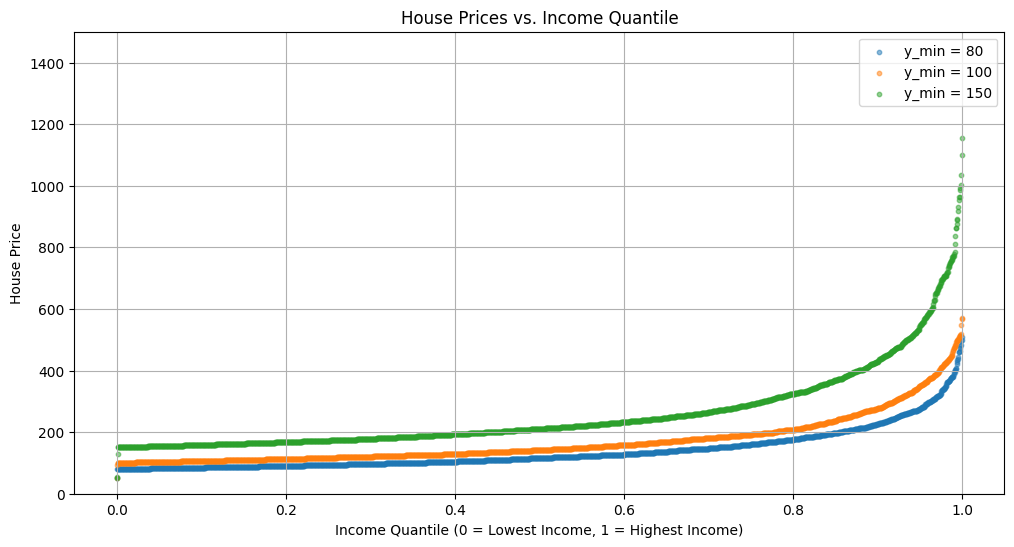

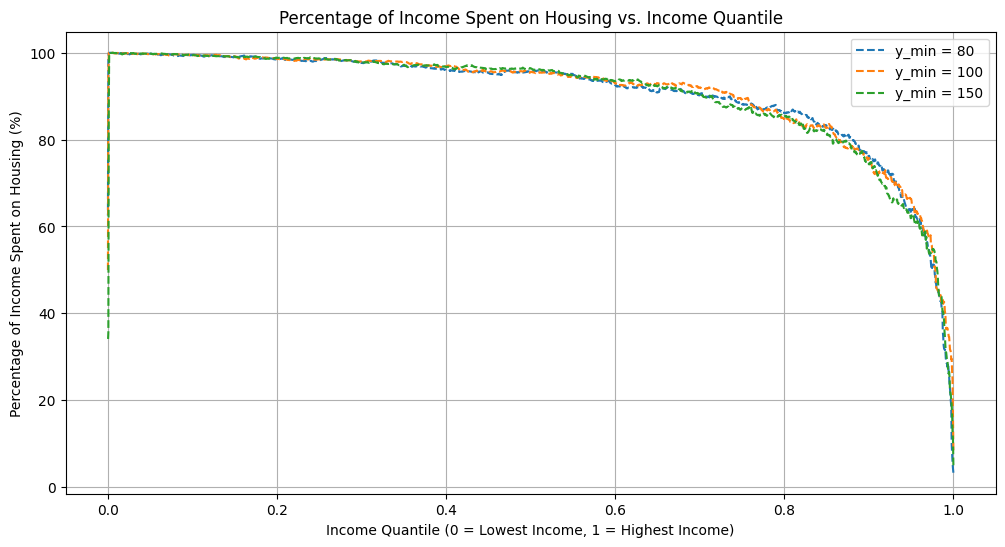

In [76]:
n = 2000
y_min_list = [80, 100, 150]
alpha = 1.75
mu = 10
c = 50

stats_list = []  # Store stats for table
all_y = []        # Store income data
all_prices = []   # Store prices

# Iterate over each y_min value
for y_min in y_min_list:
    y, d = gen_data(n, y_min, alpha, mu, c,seed)
    prices = calc_prices_iterative(n, c, y, d)
   
    # Store the data
    all_y.append(y)
    all_prices.append(prices)
    
    # Compute statistics
    stats = compute_statistics(prices)
    stats['y_min'] = y_min  
    stats_list.append(stats)
    
    # Test base case
   # base_case_price = prices[0]  # This is the price of house j=1
   # if base_case_price == c:
   #     base_case_result = f"Base Case check passed: {base_case_price}"
  #  else:
   #     base_case_result = f"Base Case check failed: {base_case_price}"

stats_df = pd.DataFrame(stats_list)
stats_df = stats_df[['y_min', 'average', 'median', 'Q1', 'Q3', 'IQR']]
print(stats_df)


# Create plots after the loop
income_quantiles = np.linspace(1, 0, n)

# First plot: House Prices vs Income Quantile
plt.figure(figsize=(12, 6))
for i, (prices, y_min) in enumerate(zip(all_prices, y_min_list)):
    plt.scatter(income_quantiles, prices, s=10, alpha=0.5, label=f'y_min = {y_min}')
plt.ylim(0, 1500)
plt.xlabel('Income Quantile (0 = Lowest Income, 1 = Highest Income)')
plt.ylabel('House Price')
plt.title('House Prices vs. Income Quantile')
plt.grid(True)
plt.legend()
plt.show()

# Second plot: Percentage of Income Spent
plt.figure(figsize=(12, 6))
for i, (y, prices, y_min) in enumerate(zip(all_y, all_prices, y_min_list)):
    percentage_spent = np.where(y != 0, (prices / y) * 100, 0)
    plt.plot(income_quantiles, percentage_spent, linestyle='--', label=f'y_min = {y_min}')

plt.xlabel('Income Quantile (0 = Lowest Income, 1 = Highest Income)')
plt.ylabel('Percentage of Income Spent on Housing (%)')
plt.title('Percentage of Income Spent on Housing vs. Income Quantile')
plt.grid(True)
plt.legend()
plt.show()



### 4b

   alpha     average      median         Q1          Q3         IQR
0   1.25  179.536192  132.756703  97.733595  201.417252  103.683657
1   1.75  137.563924  110.754474  92.259195  154.972622   62.713427
2   3.00  107.506362   98.524055  87.888938  118.304319   30.415381


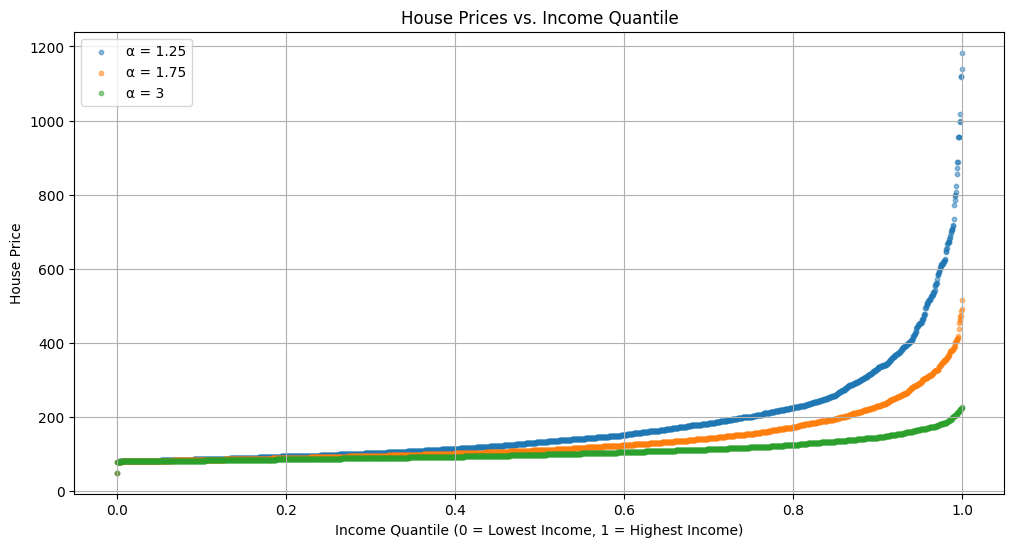

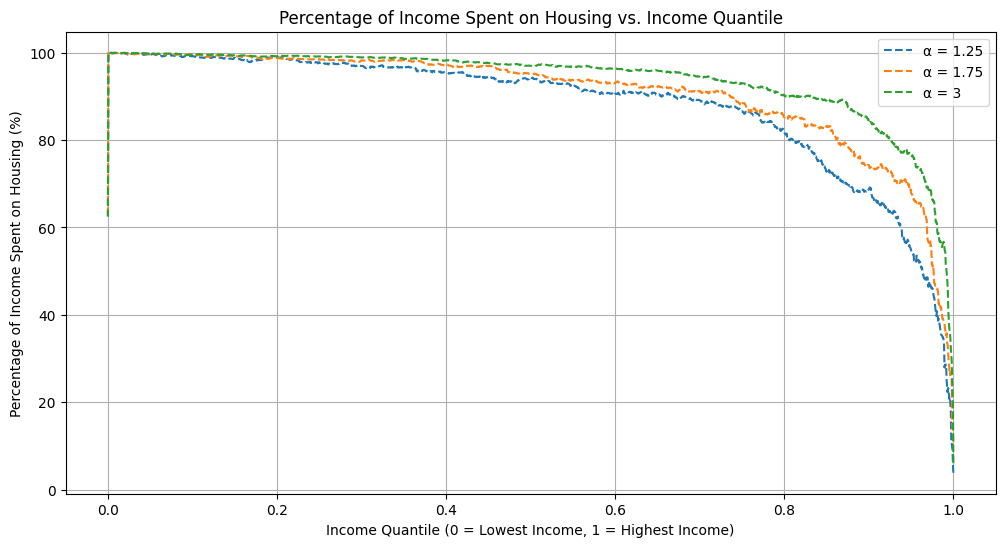

In [77]:
n = 2000
alpha_list = [1.25, 1.75, 3]
y_min = 80
mu = 10
c = 50

stats_list = []  # Store stats for table
all_y = []        # Store income data
all_prices = []   # Store prices

# Iterate over each alpha
for alpha in alpha_list:

    y, d = gen_data(n, y_min, alpha, mu, c,seed)
    prices = calc_prices_iterative(n, c, y, d)
    
    # Store the data
    all_y.append(y)
    all_prices.append(prices)
    
    # Compute statistics
    stats = compute_statistics(prices)
    stats['alpha'] = alpha  
    stats_list.append(stats)

# df for table
stats_df = pd.DataFrame(stats_list)
stats_df = stats_df[['alpha', 'average', 'median', 'Q1', 'Q3', 'IQR']]
print(stats_df)

# Create plots after the loop
income_quantiles = np.linspace(1, 0, n)

# First plot: House Prices vs Income Quantile
plt.figure(figsize=(12, 6))
for i, (prices, alpha) in enumerate(zip(all_prices, alpha_list)):
    plt.scatter(income_quantiles, prices, s=10, alpha=0.5, label=f'α = {alpha}')  

#plt.ylim(0, 1000)
plt.xlabel('Income Quantile (0 = Lowest Income, 1 = Highest Income)')
plt.ylabel('House Price')
plt.title('House Prices vs. Income Quantile')
plt.grid(True)
plt.legend()
plt.show()

# Second plot: Percentage of Income Spent
plt.figure(figsize=(12, 6))
for i, (y, prices, alpha) in enumerate(zip(all_y, all_prices, alpha_list)):
    percentage_spent = np.where(y != 0, (prices / y) * 100, 0)
    plt.plot(income_quantiles, percentage_spent, linestyle='--', label=f'α = {alpha}') 
plt.xlabel('Income Quantile (0 = Lowest Income, 1 = Highest Income)')
plt.ylabel('Percentage of Income Spent on Housing (%)')
plt.title('Percentage of Income Spent on Housing vs. Income Quantile')
plt.grid(True)
plt.legend()
plt.show()

### 4c

   mu     average      median         Q1          Q3        IQR
0   5  127.382149  111.761487  91.750297  145.579093  53.828797
1  10  142.993944  115.749474  93.403222  160.407446  67.004224
2  20  148.152971  116.344571  94.374636  164.910816  70.536181


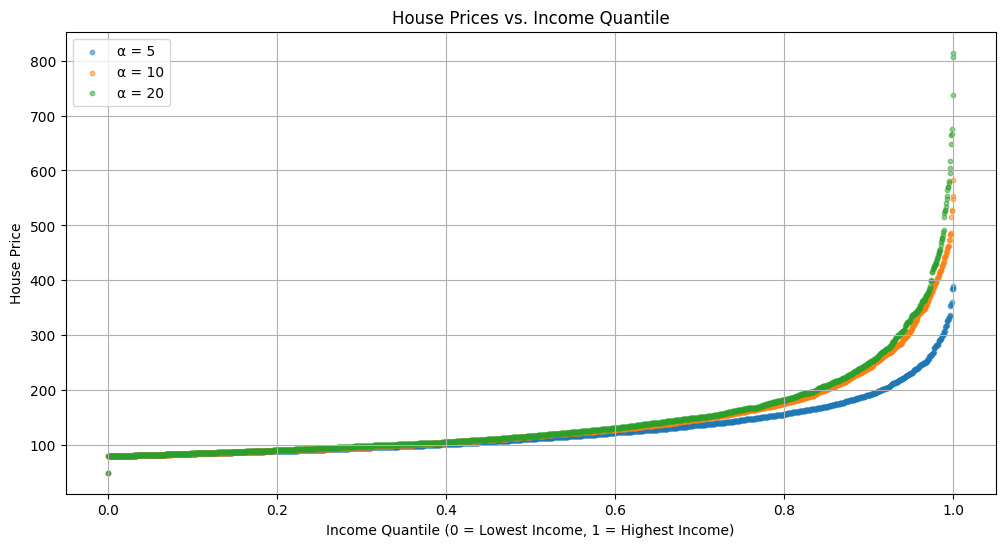

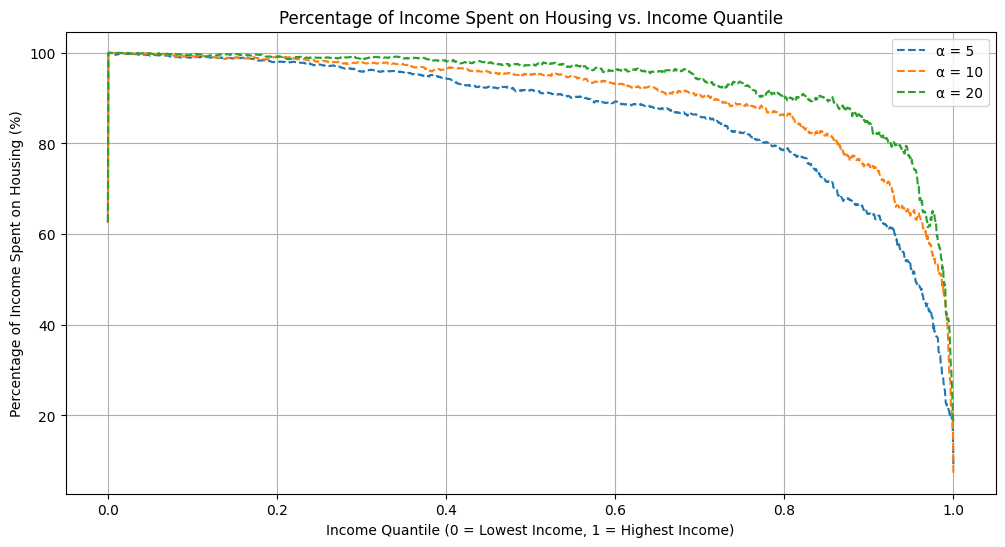

In [78]:
n = 2000
mu_list = [5,10,20]
y_min = 80
alpha = 1.75
c = 50


# Initialize lists to collect statistics and data
stats_list = []
all_y = []  # Store income data
all_prices = []  # Store price data

# Iterate over each alpha
for mu in mu_list:

    y, d = gen_data(n, y_min, alpha, mu, c,seed)
    prices = calc_prices_iterative(n, c, y, d)
    
    # Store the data
    all_y.append(y)
    all_prices.append(prices)
    
    # Compute statistics
    stats = compute_statistics(prices)
    stats['mu'] = mu  
    stats_list.append(stats)

# df for table
stats_df = pd.DataFrame(stats_list)
stats_df = stats_df[['mu', 'average', 'median', 'Q1', 'Q3', 'IQR']]  
print(stats_df)

# Create plots after the loop
income_quantiles = np.linspace(1, 0, n)

# First plot: House Prices vs Income Quantile
plt.figure(figsize=(12, 6))
for i, (prices, mu) in enumerate(zip(all_prices, mu_list)):
    plt.scatter(income_quantiles, prices, s=10, alpha=0.5, label=f'α = {mu}') 
#plt.ylim(0, 1000)
plt.xlabel('Income Quantile (0 = Lowest Income, 1 = Highest Income)')
plt.ylabel('House Price')
plt.title('House Prices vs. Income Quantile')
plt.grid(True)
plt.legend()
plt.show()

# Second plot: Percentage of Income Spent
plt.figure(figsize=(12, 6))
for i, (y, prices, mu) in enumerate(zip(all_y, all_prices, mu_list)):
    percentage_spent = np.where(y != 0, (prices / y) * 100, 0)
    plt.plot(income_quantiles, percentage_spent, linestyle='--', label=f'α = {mu}')  # Fixed: Label shows alpha
plt.xlabel('Income Quantile (0 = Lowest Income, 1 = Highest Income)')
plt.ylabel('Percentage of Income Spent on Housing (%)')
plt.title('Percentage of Income Spent on Housing vs. Income Quantile')
plt.grid(True)
plt.legend()
plt.show()

# Population Growth

## Building up

      n     average      median         Q1          Q3        IQR
0  2000  138.287552  114.801966  93.570206  157.543597  63.973390
1  4000  136.566758  113.304075  93.032849  154.402215  61.369366


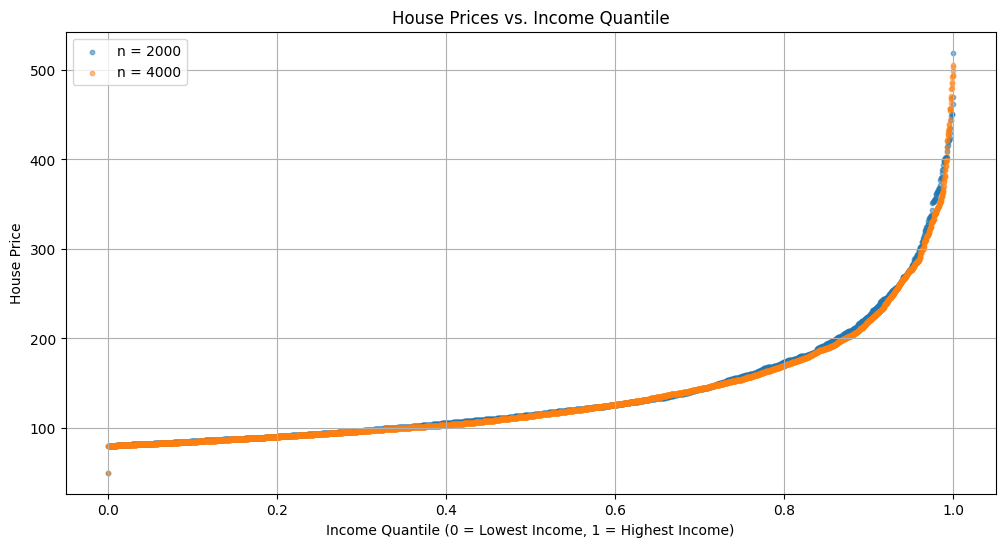

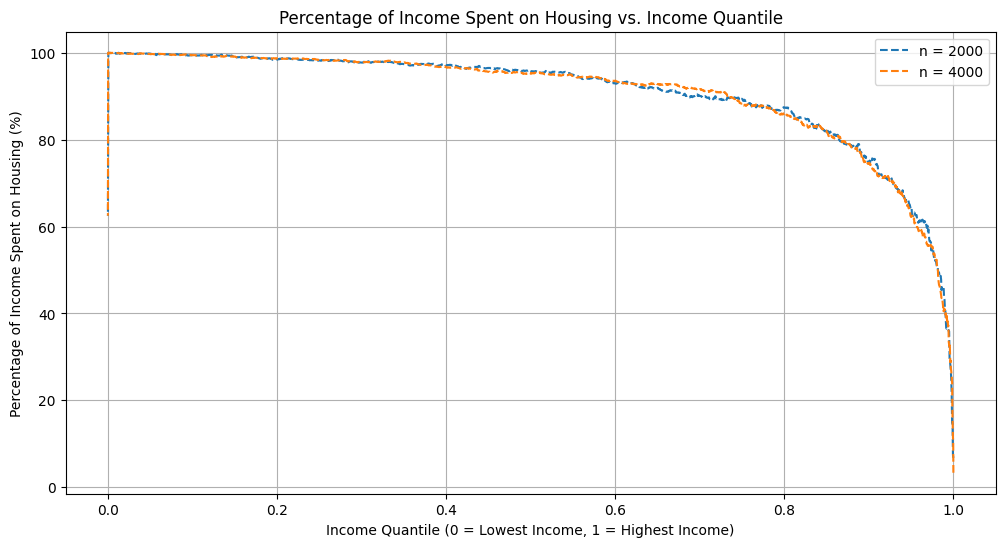

In [79]:
n_list = [2000, 4000]
alpha = 1.75
y_min = 80
mu = 10
c = 50

stats_list = []  # Store stats for table
all_y = []        # Store income data
all_prices = []   # Store prices


for n in n_list:

    y, d = gen_data(n, y_min, alpha, mu, c,seed)
    prices = calc_prices_iterative(n, c, y, d) # the regular recursive approach does not work with n=4000
    all_y.append(y)
    all_prices.append(prices)
    
    # Compute statistics
    stats_i = compute_statistics(prices)
    stats_i['n'] = n  
    stats_list.append(stats_i)

# Create a DataFrame for statistics
stats_df = pd.DataFrame(stats_list)
stats_df = stats_df[['n', 'average', 'median', 'Q1', 'Q3', 'IQR']]
print(stats_df)

# Create plots after the loop

# First Plot: House Prices vs Income Quantile
plt.figure(figsize=(12, 6))
for prices, n in zip(all_prices, n_list):
    income_quantiles = np.linspace(1, 0, len(prices))
    plt.scatter(income_quantiles, prices, s=10, alpha=0.5, label=f'n = {n}')
#plt.ylim(0, 1000)
plt.xlabel('Income Quantile (0 = Lowest Income, 1 = Highest Income)')
plt.ylabel('House Price')
plt.title('House Prices vs. Income Quantile')
plt.grid(True)
plt.legend()
plt.show()

# Second Plot: Percentage of Income Spent
plt.figure(figsize=(12, 6))
for y, prices, n in zip(all_y, all_prices, n_list):
    income_quantiles = np.linspace(1, 0, len(prices))
    percentage_spent = np.where(y != 0, (prices / y) * 100, 0)
    plt.plot(income_quantiles, percentage_spent, linestyle='--', label=f'n = {n}')
plt.xlabel('Income Quantile (0 = Lowest Income, 1 = Highest Income)')
plt.ylabel('Percentage of Income Spent on Housing (%)')
plt.title('Percentage of Income Spent on Housing vs. Income Quantile')
plt.grid(True)
plt.legend()
plt.show()


## Building out

      n  mu     average      median         Q1          Q3        IQR
0  2000  10  137.896572  113.064201  92.182051  155.943551  63.761500
1  4000  20  149.423924  117.756442  93.359311  164.423495  71.064184


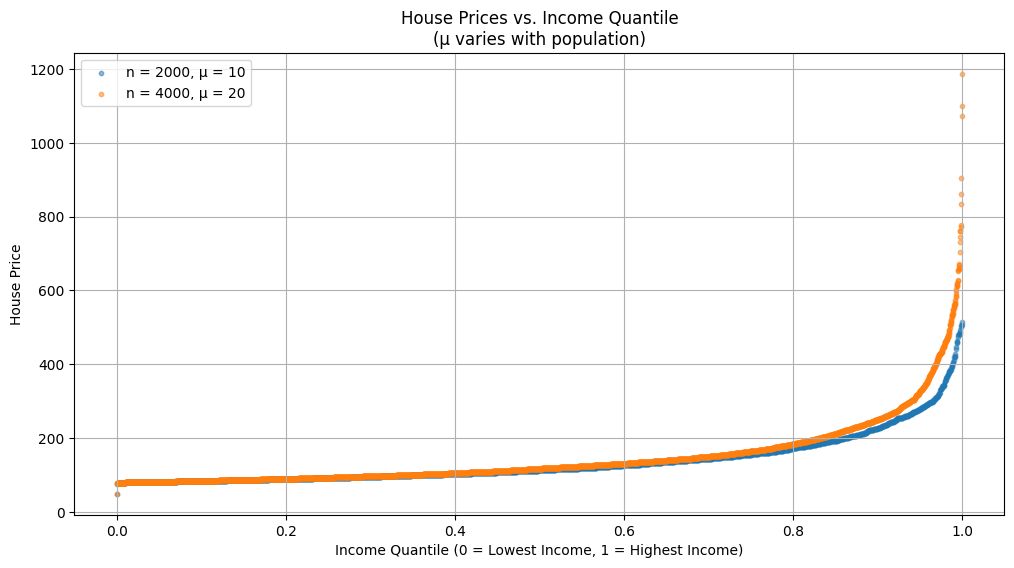

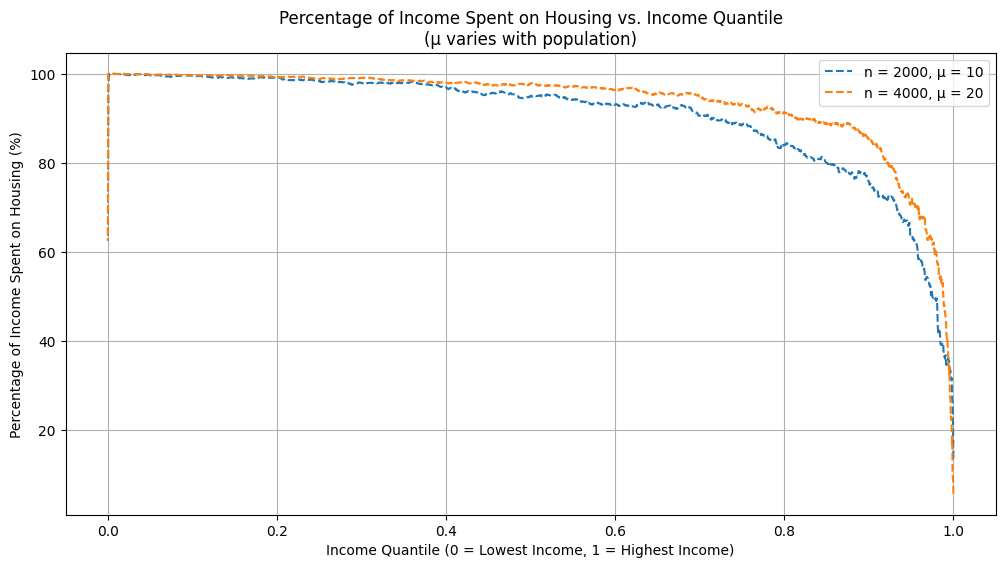

In [80]:
n_list = [2000, 4000]
alpha = 1.75
y_min = 80
c = 50
stats_list = []  # Store stats for table
all_y = []       # Store income data
all_prices = []  # Store prices

# Create dictionary mapping population sizes to mu values
mu_dict = {2000: 10, 4000: 20}  # mu doubles for larger population

for n in n_list:
    # Get appropriate mu for this population size
    mu = mu_dict[n]
    
    y, d = gen_data(n, y_min, alpha, mu, c,seed)
    prices = calc_prices_iterative(n, c, y, d)
    all_y.append(y)
    all_prices.append(prices)
   
    # Compute statistics
    stats_i = compute_statistics(prices)
    stats_i['n'] = n
    stats_i['mu'] = mu  # Add mu to statistics for reference
    stats_list.append(stats_i)

# Create a DataFrame for statistics
stats_df = pd.DataFrame(stats_list)
stats_df = stats_df[['n', 'mu', 'average', 'median', 'Q1', 'Q3', 'IQR']]
print(stats_df)

# First Plot: House Prices vs Income Quantile
plt.figure(figsize=(12, 6))
for prices, n in zip(all_prices, n_list):
    income_quantiles = np.linspace(1, 0, len(prices))
    plt.scatter(income_quantiles, prices, s=10, alpha=0.5, 
                label=f'n = {n}, μ = {mu_dict[n]}')
plt.xlabel('Income Quantile (0 = Lowest Income, 1 = Highest Income)')
plt.ylabel('House Price')
plt.title('House Prices vs. Income Quantile\n(μ varies with population)')
plt.grid(True)
plt.legend()
plt.show()

# Second Plot: Percentage of Income Spent
plt.figure(figsize=(12, 6))
for y, prices, n in zip(all_y, all_prices, n_list):
    income_quantiles = np.linspace(1, 0, len(prices))
    percentage_spent = np.where(y != 0, (prices / y) * 100, 0)
    plt.plot(income_quantiles, percentage_spent, linestyle='--', 
             label=f'n = {n}, μ = {mu_dict[n]}')
plt.xlabel('Income Quantile (0 = Lowest Income, 1 = Highest Income)')
plt.ylabel('Percentage of Income Spent on Housing (%)')
plt.title('Percentage of Income Spent on Housing vs. Income Quantile\n(μ varies with population)')
plt.grid(True)
plt.legend()
plt.show()

## 7

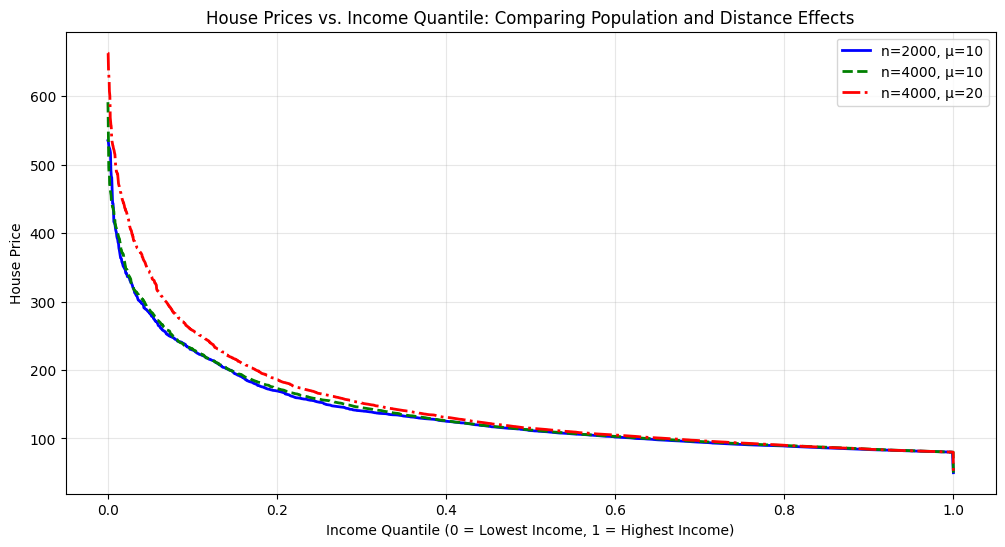

In [81]:
# define dictionary of scenarios because two of the variables change
scenarios = [
    {'n': 2000, 'mu': 10, 'label': 'n=2000, μ=10'},
    {'n': 4000, 'mu': 10, 'label': 'n=4000, μ=10'},
    {'n': 4000, 'mu': 20, 'label': 'n=4000, μ=20'}
]

alpha = 1.75
y_min = 80
c = 50

# Store results
all_prices = []
all_quantiles = []

# Generate data for each scenario
for scenario in scenarios:
    n = scenario['n']
    mu = scenario['mu']
    
    # Generate data and calculate prices
    y, d = gen_data(n, y_min, alpha, mu, c,seed)
    prices = calc_prices_iterative(n, c, y, d)
    
    # Store results
    all_prices.append(prices)
    all_quantiles.append(np.linspace(0, 1, len(prices)))

# plot comparison
plt.figure(figsize=(12, 6))

styles = ['-', '--', '-.']
colors = ['blue', 'green', 'red']

for (prices, quantiles, scenario, style, color) in zip(all_prices, all_quantiles, scenarios, styles, colors):
    plt.plot(quantiles, prices, 
             linestyle=style,
             color=color,
             label=scenario['label'],
             linewidth=2)

plt.xlabel('Income Quantile (0 = Lowest Income, 1 = Highest Income)')
plt.ylabel('House Price')
plt.title('House Prices vs. Income Quantile: Comparing Population and Distance Effects')
plt.grid(True, alpha=0.3)
plt.legend()

#plt.xlim(0.98, 1.01) # zoom in

plt.show()



# Tax

# Check

In [82]:
def save_agents_to_excel(n, y, d, prices, filename="check.xlsx"):
    """
    Create and save an Excel file containing agent data
    
    Parameters:
    n (int): Number of agents
    y (array): Income array
    d (array): Distance array
    prices (array): Equilibrium prices array
    filename (str): Name of the Excel file to save
    """
    try:
        # Create a DataFrame with agent information
        data = {
            'Agent': list(range(1, n + 1)),  # Agents numbered from 1 to n
            'Income': y,
            'Distance': d,
            'Price': prices
        }
        
        df = pd.DataFrame(data)
        
        # Save to Excel
        df.to_excel(filename, index=False)
        print(f"Data successfully saved to '{filename}'")
        
    except Exception as e:
        print(f"An error occurred while saving to Excel: {e}")

# Example usage:
n = 2000
y_min = 80
alpha = 1.75
mu = 10
c = 50

# Generate data
y, d = gen_data(n, y_min, alpha, mu, c, seed)

# Calculate equilibrium prices
prices = calc_prices_iterative(n, c, y, d)

# Save to Excel
save_agents_to_excel(n, y, d, prices)

Data successfully saved to 'check.xlsx'


## Data gen

In [83]:
def gen_data_with_tax(n,y_min,alpha,mu,c,tau,seed):

    # Validate parameters
    if y_min <= c:
        raise ValueError("y_min needs to be greater than c")
    if alpha <= 1:
        raise ValueError("alpha needs to be greater than 1")
    if mu <= 0:
        raise ValueError("mu needs to be positive")
    if not 0 <= tau < 1:
        raise ValueError("tau must be between 0 and 1")
        
    np.random.seed(seed)
    
    # Generate pre-tax incomes (Pareto distribution)
    U = np.random.uniform(size=n)
    y = y_min * (1 - U) ** (-1.0 / alpha)
    
    # Generate distances (exponential distribution)
    U_exp = np.random.uniform(size=n)
    d = -mu * np.log(U_exp)
    
    # Sort both arrays
    y = np.sort(y)
    d = np.sort(d)
    
    # Calculate average income
    y_bar = np.mean(y)
    
    # Calculate transfer amount (T = τ * y_bar)
    T = tau * y_bar
    
    # Calculate post-tax income for each agent
    x = (1 - tau) * y + T
    x = np.sort(x) # sort (might not be necessary)
    return y, x, d

## Plotting

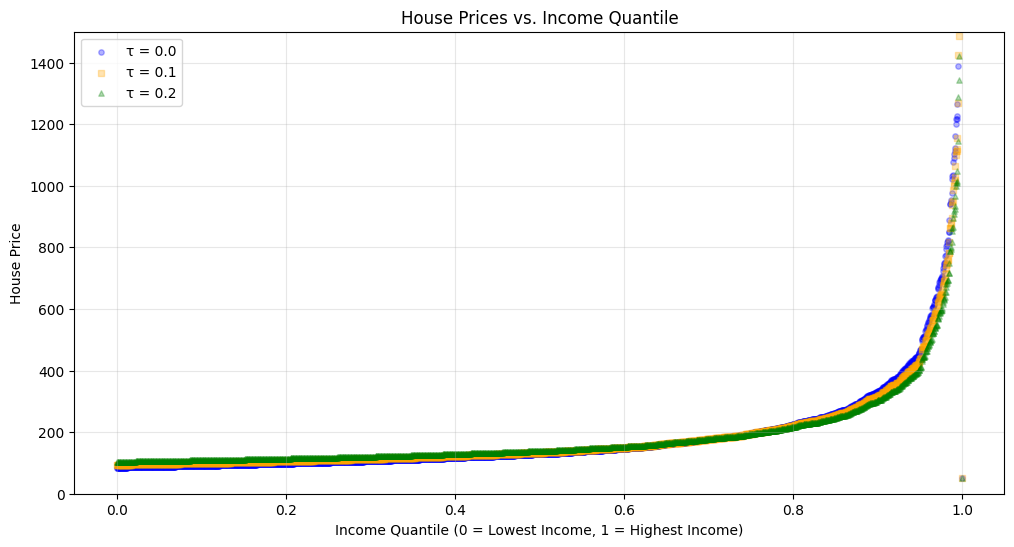

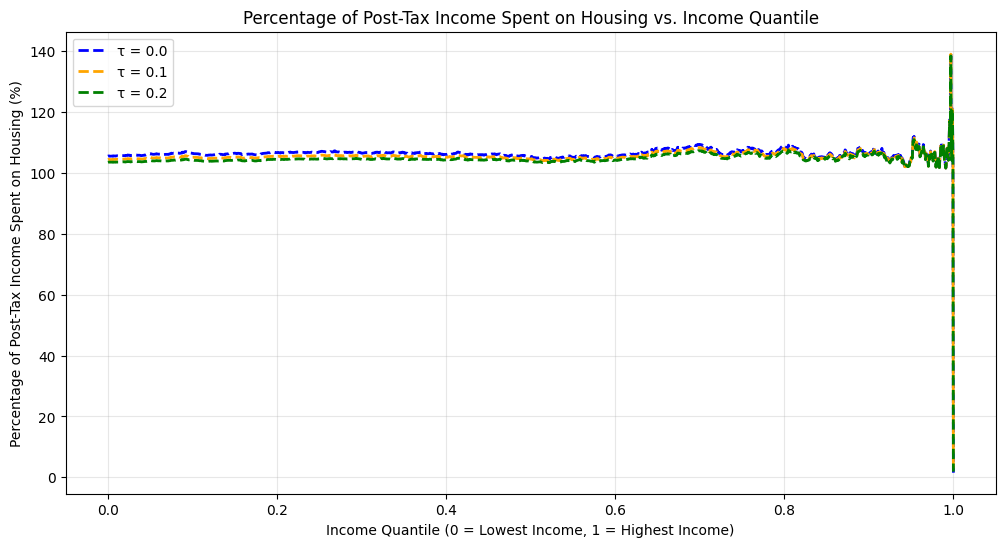

In [84]:
n=2000
y_min=80
alpha=1.75
mu=10
c=50
tau_list=[0.0,0.1,0.2]
seed=1

# Store data for all tax rates
all_y = []      # pre-tax incomes
all_x = []      # post-tax incomes
all_prices = []
for tau in tau_list:
    y, x, d = gen_data_with_tax(n, y_min, alpha, mu, c, tau, seed)
    prices = calc_prices_recursive(n, c, x, d)  # using post tax income (x) for calculations 
    all_y.append(y)
    all_x.append(x)
    all_prices.append(prices)

income_quantiles = np.linspace(0, 1, n)

# First Plot: House Prices vs Income Quantile
plt.figure(figsize=(12, 6))
colors = ['blue', 'orange', 'green']
markers = ['o', 's', '^']
for prices, tau, color, marker in zip(all_prices, tau_list, colors, markers):
    plt.scatter(income_quantiles, prices, 
               s=15,
               alpha=0.3,
               color=color,
               marker=marker,
               label=f'τ = {tau}')
plt.ylim(0, 1500)
plt.xlabel('Income Quantile (0 = Lowest Income, 1 = Highest Income)')
plt.ylabel('House Price')
plt.title('House Prices vs. Income Quantile')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# Second Plot: Percentage of Income Spent (using post-tax income)
plt.figure(figsize=(12, 6))
for x, prices, tau, color in zip(all_x, all_prices, tau_list, colors):  # Using x 
    percentage_spent = np.where(x != 0, (prices / x) * 100, 0)  # using x
    plt.plot(income_quantiles, percentage_spent, 
            linestyle='--', 
            color=color,
            linewidth=2,
            label=f'τ = {tau}')
plt.xlabel('Income Quantile (0 = Lowest Income, 1 = Highest Income)')
plt.ylabel('Percentage of Post-Tax Income Spent on Housing (%)') 
plt.title('Percentage of Post-Tax Income Spent on Housing vs. Income Quantile')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# Alt approach - all df

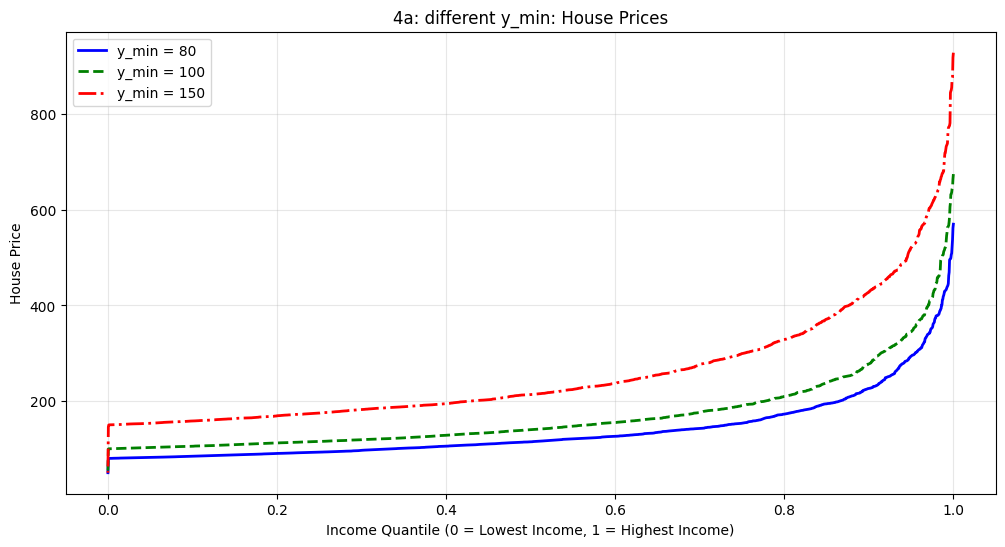

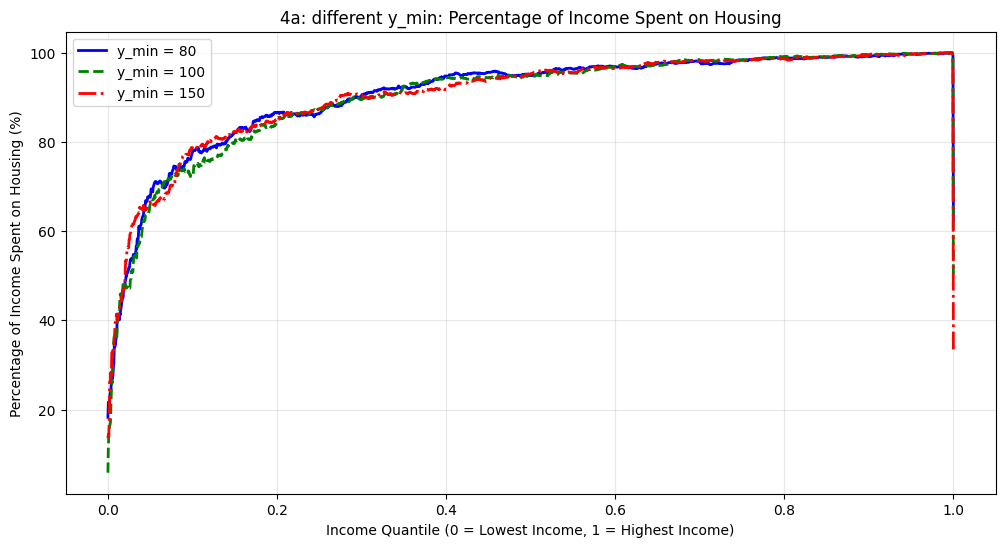

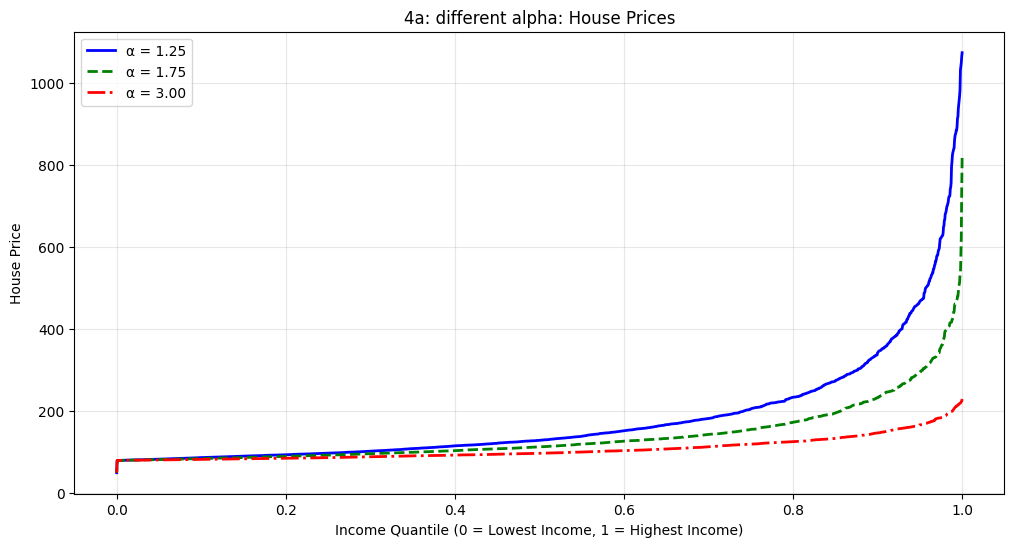

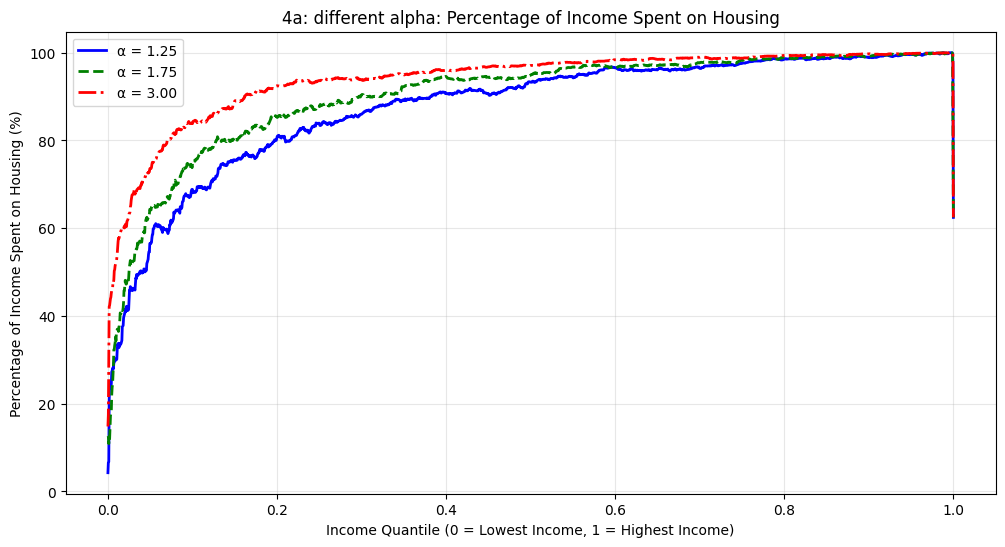

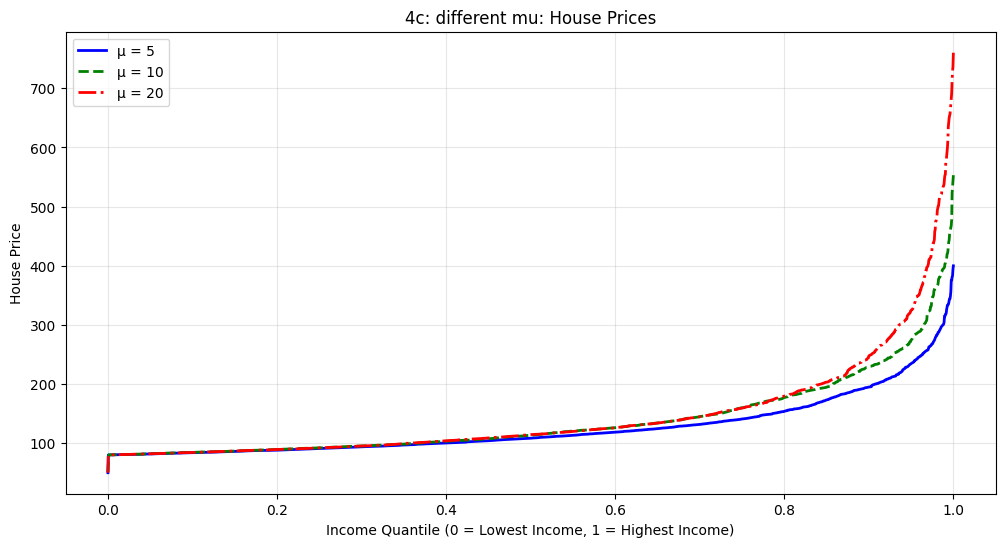

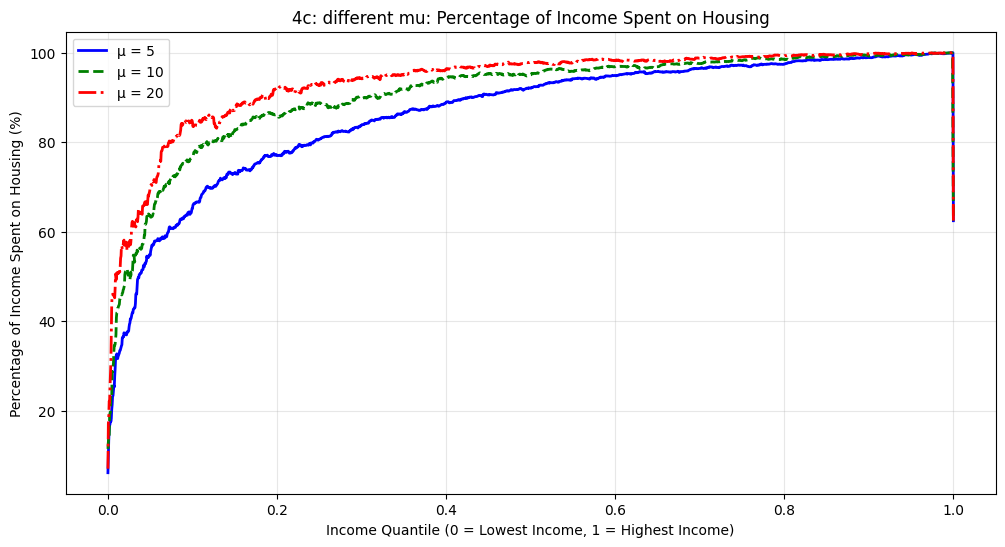

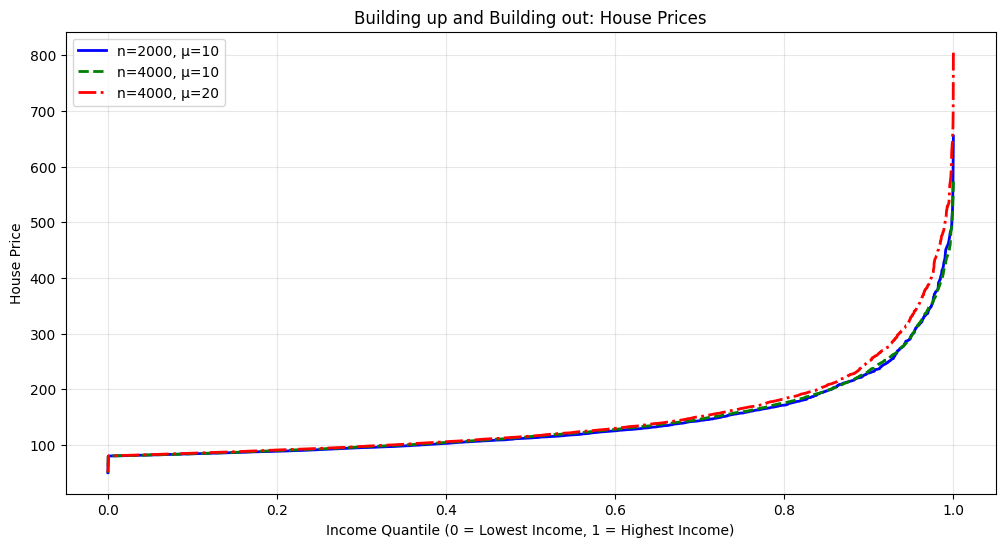

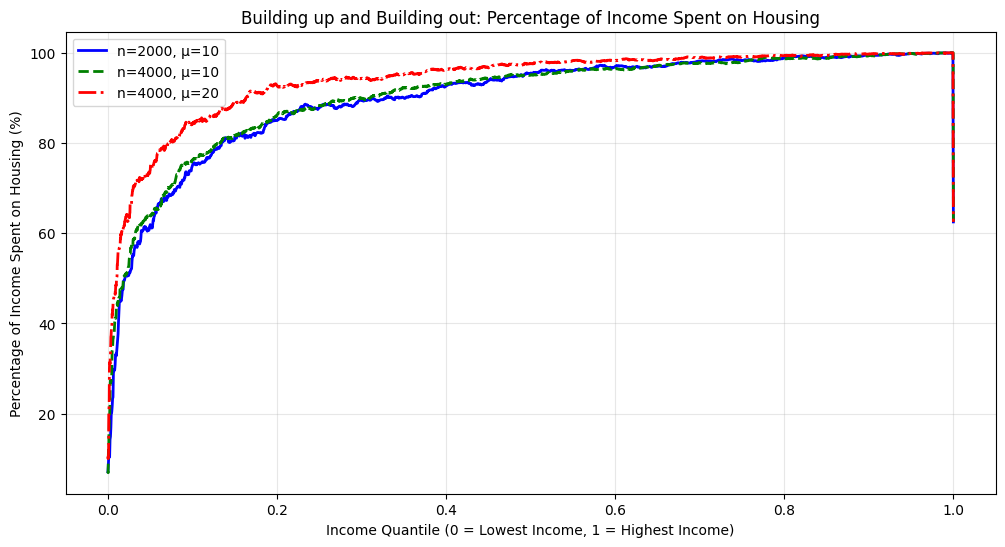

In [89]:
scenarios = [
    # 4a: Varying y_min
    {"y_min": 80, "n": 2000, "mu": 10, "c": 50, "alpha": 1.75, "label": "y_min = 80"},
    {"y_min": 100, "n": 2000, "mu": 10, "c": 50, "alpha": 1.75, "label": "y_min = 100"},
    {"y_min": 150, "n": 2000, "mu": 10, "c": 50, "alpha": 1.75, "label": "y_min = 150"},
    
    # 4b: Varying alpha
    {"alpha": 1.25, "y_min": 80, "n": 2000, "mu": 10, "c": 50, "label": "α = 1.25"},
    {"alpha": 1.75, "y_min": 80, "n": 2000, "mu": 10, "c": 50, "label": "α = 1.75"},
    {"alpha": 3.00, "y_min": 80, "n": 2000, "mu": 10, "c": 50, "label": "α = 3.00"},
    
    # 4c: Varying mu
    {"mu": 5, "y_min": 80, "n": 2000, "c": 50, "alpha": 1.75, "label": "μ = 5"},
    {"mu": 10, "y_min": 80, "n": 2000, "c": 50, "alpha": 1.75, "label": "μ = 10"},
    {"mu": 20, "y_min": 80, "n": 2000, "c": 50, "alpha": 1.75, "label": "μ = 20"},
   
    # Building up and out
    {"n": 2000, "mu": 10, "y_min": 80, "c": 50, "alpha": 1.75, "label": "n=2000, μ=10"},
    {"n": 4000, "mu": 10, "y_min": 80, "c": 50, "alpha": 1.75, "label": "n=4000, μ=10"},
    {"n": 4000, "mu": 20, "y_min": 80, "c": 50, "alpha": 1.75, "label": "n=4000, μ=20"}
]

def plot_scenario_group(scenario_group, title_base, zoom=False):
 
    # Store results
    all_prices = []
    all_quantiles = []
    all_y = []
    
    # Generate data for each scenario
    for scenario in scenario_group:
        # Generate data and calculate prices
        y, d = gen_data(scenario['n'], scenario['y_min'], scenario['alpha'], 
                       scenario['mu'], scenario['c'], seed)
        prices = calc_prices_iterative(scenario['n'], scenario['c'], y, d)
        
        # Store results
        all_prices.append(prices)
        all_quantiles.append(np.linspace(1, 0, len(prices)))
        all_y.append(y)
    
    # First plot: House Prices
    plt.figure(figsize=(12, 6))
    styles = ['-', '--', '-.']
    colors = ['blue', 'green', 'red']
    
    for (prices, quantiles, scenario, style, color) in zip(
            all_prices, all_quantiles, scenario_group, styles, colors):
        plt.plot(quantiles, prices, 
                linestyle=style,
                color=color,
                label=scenario['label'],
                linewidth=2)
    
    plt.xlabel('Income Quantile (0 = Lowest Income, 1 = Highest Income)')
    plt.ylabel('House Price')
    plt.title(f'{title_base}: House Prices')
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    if zoom:
        plt.xlim(0.98, 1.01)
    
    plt.show()
    
    # Second plot: Percentage of Income Spent
    plt.figure(figsize=(12, 6))
    
    for (y, prices, scenario, style, color) in zip(
            all_y, all_prices, scenario_group, styles, colors):
        percentage_spent = np.where(y != 0, (prices / y) * 100, 0)
        plt.plot(np.linspace(0, 1, len(y)), percentage_spent,
                linestyle=style,
                color=color,
                label=scenario['label'],
                linewidth=2)
    
    plt.xlabel('Income Quantile (0 = Lowest Income, 1 = Highest Income)')
    plt.ylabel('Percentage of Income Spent on Housing (%)')
    plt.title(f'{title_base}: Percentage of Income Spent on Housing')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()

# Plot each group using slices of your scenarios list
plot_scenario_group(scenarios[0:3], 
                   '4a: different y_min')

plot_scenario_group(scenarios[3:6],
                   '4a: different alpha')

plot_scenario_group(scenarios[6:9],
                   '4c: different mu')

plot_scenario_group(scenarios[9:12],
                   'Building up and Building out')



# Low Income Housing

In [86]:


def gen_data_restricted(n, y_min, alpha, mu, c, seed=1):
   
    if y_min <= c:
        raise ValueError("y_min needs to be greater than c")
    if alpha <= 1:
        raise ValueError("alpha needs to be greater than 1")
    if mu <= 0:
        raise ValueError("mu needs to be positive")
    if n % 2 != 0:
        raise ValueError("n must be even")

    # Set random seed for reproducibility
    np.random.seed(seed)

    # Generate incomes using a Pareto-like distribution
    U = np.random.uniform(size=n)
    y = y_min * (1 - U) ** (-1.0 / alpha)

    # Generate house distances using an exponential distribution
    U_exp = np.random.uniform(size=n)
    d = -mu * np.log(U_exp)

    # Sort incomes in descending order and distances in ascending order
    y = np.sort(y)[::-1]
    d = np.sort(d)

    # Identify restricted houses: every third house (1-based indexing: 3, 6, 9, ...)
    # In 0-based indexing: indices 2, 5, 8, ...
    restricted_houses = np.zeros(n, dtype=bool)
    restricted_houses[2::3] = True  # Set every third house as restricted

    # Split agents into high-income and low-income groups
    # Since n is even, the median splits the agents exactly in half
    m = n // 2
    high_income_agents = np.zeros(n, dtype=bool)
    high_income_agents[:m] = True          # First half are high-income
    low_income_agents = ~high_income_agents  # Second half are low-income

    return y, d, restricted_houses, high_income_agents, low_income_agents

def allocate_houses(y, d, restricted_houses, high_income_agents, low_income_agents):
   
    n = len(y)
    m = n // 2

    # Identify restricted and unrestricted houses
    restricted = np.where(restricted_houses)[0]
    unrestricted = np.where(~restricted_houses)[0]

    # High-income agents: first m agents
    high_agents = np.arange(m)
    # Low-income agents: last m agents
    low_agents = np.arange(m, n)

    # Number of unrestricted houses must be >= m
    if len(unrestricted) < m:
        raise ValueError("Not enough unrestricted houses for high-income agents.")

    # Assign the closest m unrestricted houses to high-income agents
    # Unrestricted houses are sorted ascendingly
    # Assign to high agents sorted by y descendingly
    high_agents_sorted = high_agents[np.argsort(-y[high_agents])]
    allocated_unrestricted = unrestricted[:m]
    # Create mapping: agent -> house
    high_allocation = dict(zip(high_agents_sorted, allocated_unrestricted))

    # Assign restricted houses to low-income agents
    # Restricted houses are sorted ascendingly
    low_agents_sorted = low_agents[np.argsort(-y[low_agents])]
    allocated_restricted = restricted[:len(low_agents_sorted)]
    low_allocation = {}
    for agent, house in zip(low_agents_sorted, allocated_restricted):
        low_allocation[agent] = house

    # If more low-income agents than restricted houses, assign remaining to unrestricted houses
    if len(low_agents_sorted) > len(restricted):
        extra_low_agents = low_agents_sorted[len(restricted):]
        # Assign to the farthest unrestricted houses not allocated to high-income agents
        remaining_unrestricted = unrestricted[m:]
        # Sort remaining unrestricted houses in descending order (farthest first)
        remaining_unrestricted_sorted = np.sort(remaining_unrestricted)[::-1]
        if len(remaining_unrestricted_sorted) < len(extra_low_agents):
            raise ValueError("Not enough unrestricted houses for low-income agents.")
        allocated_extra_unrestricted = remaining_unrestricted_sorted[:len(extra_low_agents)]
        for agent, house in zip(extra_low_agents, allocated_extra_unrestricted):
            low_allocation[agent] = house

    # Combine allocations
    agent_house = np.full(n, -1, dtype=int)
    for agent, house in high_allocation.items():
        agent_house[agent] = house
    for agent, house in low_allocation.items():
        agent_house[agent] = house

    # Verify all agents have been allocated
    if -1 in agent_house:
        raise ValueError("Not all agents have been allocated a house.")

    return agent_house

def compute_prices(y, d, agent_house, c, restricted_houses):
    n = len(y)
    p = np.full(n, c)

    # Split into high-income and low-income submarkets
    m = n // 2
    high_agents = np.arange(m)
    low_agents = np.arange(m, n)

    # Find houses allocated to high and low agents
    high_houses = agent_house[high_agents]
    low_houses = agent_house[low_agents]

    # Sort high_houses ascendingly (closest first)
    high_houses_sorted = np.sort(high_houses)
    # Sort high_agents by descending y
    high_agents_sorted_by_y = high_agents[np.argsort(-y[high_agents])]

    # Sort low_houses ascendingly (closest first)
    low_houses_sorted = np.sort(low_houses)
    # Sort low_agents by descending y
    low_agents_sorted_by_y = low_agents[np.argsort(-y[low_agents])]

    # Compute prices for high-income submarket
    m_high = len(high_houses_sorted)
    if m_high > 0:
        p_high = np.zeros(m_high)
        # Initialize the farthest house price to c
        p_high[-1] = max(c, c)  # Ensures price is at least c
        # Iterate from the second farthest to the closest house
        for j in range(m_high - 2, -1, -1):
            delta_d = d[high_houses_sorted[j+1]] - d[high_houses_sorted[j]]
            theta = np.exp(-delta_d)
            # y_next is the income of the next lower-income high-agent
            y_next = y[high_agents_sorted_by_y[j+1]]
            p_high[j] = theta * p_high[j+1] + (1 - theta) * y_next
            p_high[j] = max(p_high[j], c)
        # Assign computed prices to the corresponding houses
        p[high_houses_sorted] = p_high

    # Compute prices for low-income submarket
    m_low = len(low_houses_sorted)
    if m_low > 0:
        p_low = np.zeros(m_low)
        # Initialize the farthest house price to c
        p_low[-1] = max(c, c)  # Ensures price is at least c
        # Iterate from the second farthest to the closest house
        for j in range(m_low - 2, -1, -1):
            delta_d = d[low_houses_sorted[j+1]] - d[low_houses_sorted[j]]
            theta = np.exp(-delta_d)
            # y_next is the income of the next lower-income low-agent
            y_next = y[low_agents_sorted_by_y[j+1]]
            p_low[j] = theta * p_low[j+1] + (1 - theta) * y_next
            p_low[j] = max(p_low[j], c)
        # Assign computed prices to the corresponding houses
        p[low_houses_sorted] = p_low

    return p

def create_dataframe(y, d, p, agent_house, restricted_houses):
    n = len(y)
    agent_ids = np.arange(1, n+1)
    assigned_houses = agent_house + 1  # Convert to 1-based indexing for readability
    low_income_house = restricted_houses[agent_house]

    agent_df = pd.DataFrame({
        'Agent_ID': agent_ids,
        'Income_y': y,
        'House_ID': assigned_houses,
        'House_Distance_d': d[agent_house],
        'House_Price_p': p[agent_house],
        'Low_Income_House': low_income_house
    })
    return agent_df

def save_to_excel(df, filename="agent_allocation.xlsx"):
    """
    Saves the DataFrame to an Excel file.

    Parameters:
    - df (pd.DataFrame): The DataFrame to save.
    - filename (str): The name of the Excel file.
    """
    try:
        df.to_excel(filename, index=False)
        print(f"DataFrame successfully saved to '{filename}'.")
    except Exception as e:
        print(f"An error occurred while saving to Excel: {e}")

# Example Usage
if __name__ == "__main__":
    # Define parameters
    n=2000
    y_min=80
    alpha=1.75
    mu=10
    c=50    

    # Step 1: Generate Data
    y, d, restricted_houses, high_income_agents, low_income_agents = gen_data_restricted(n, y_min, alpha, mu, c, seed)

    # Step 2: Allocate Houses
    agent_house = allocate_houses(y, d, restricted_houses, high_income_agents, low_income_agents)

    # Step 3: Compute Equilibrium Prices
    p = compute_prices(y, d, agent_house, c, restricted_houses)

    # Step 4: Create DataFrame with Low-Income House Indicator
    df = create_dataframe(y, d, p, agent_house, restricted_houses)

    # Display the DataFrame
    print("Agent Allocation and Pricing DataFrame:")
    print(df)

    # Step 5: Save DataFrame to Excel
    save_to_excel(df, filename="agent_allocation.xlsx")


Agent Allocation and Pricing DataFrame:
      Agent_ID     Income_y  House_ID  House_Distance_d  House_Price_p  \
0            1  3312.594958         1          0.001242            676   
1            2  3183.080925         2          0.014019            644   
2            3  2700.221455         4          0.022401            627   
3            4  2446.223493         5          0.028653            615   
4            5  2360.431165         7          0.034030            606   
...        ...          ...       ...               ...            ...   
1995      1996    80.131512      1507         14.115548             92   
1996      1997    80.047258      1505         14.066977             92   
1997      1998    80.034964      1504         14.052687             92   
1998      1999    80.018384      1502         14.026500             92   
1999      2000    80.005229      1501         14.025052             92   

      Low_Income_House  
0                False  
1                Fals

In [87]:

# Example parameters
n=2000
y_min=80
alpha=1.75
mu=10
c=50

# Generate data
#y, d, restricted_houses, high_income_agents, low_income_agents = gen_restricted_data(n, y_min, alpha, mu, c, seed)

# Display the results
print(y)

print(d)


print(restricted_houses)

print(high_income_agents)


print(low_income_agents)

[3312.59495811 3183.08092468 2700.22145471 ...   80.03496434   80.01838409
   80.00522903]
[1.24220141e-03 1.40189361e-02 1.68466797e-02 ... 7.20762740e+01
 7.82810410e+01 9.24130808e+01]
[False False  True ...  True False False]
[ True  True  True ... False False False]
[False False False ...  True  True  True]



## Running DocTest tests

This last step gets the DocTest system to check test cases in the documentation comments.
In this course, you won't need to modify the stuff below, or even understand the details.

In [88]:
import doctest
result = doctest.testmod(verbose=False)
if result[0] == 0:
    print(("Congratulations! You have passed all "+str(result[1])+" tests"))
else:
    print("Rats!")

Congratulations! You have passed all 0 tests
